In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

----

# Регрессия

In [5]:
X = np.linspace(3, 9).reshape(-1, 1)
y = (1.5*np.sin(X) + np.random.rand(*X.shape)).ravel()

In [6]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

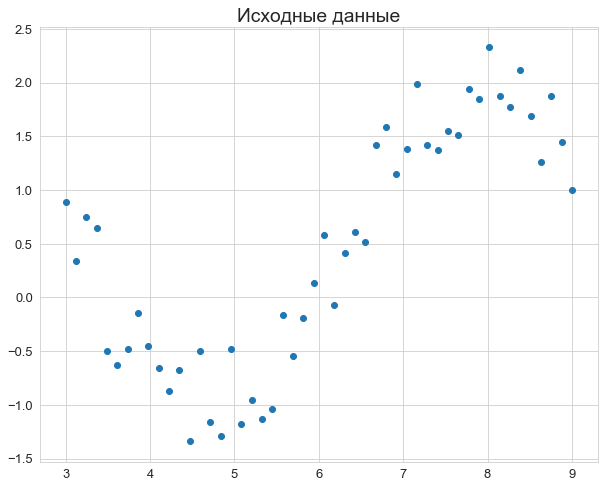

In [7]:
plt.scatter(X, y);
plt.title('Исходные данные');

## Валидация с помощью K-Fold

In [8]:
from sklearn.model_selection import KFold

In [9]:
kfold = KFold(n_splits=4)

for train_indices, test_indices in kfold.split(X, y):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    break

In [10]:
train_indices

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49])

In [11]:
test_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

/Users/sandpiturtle/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


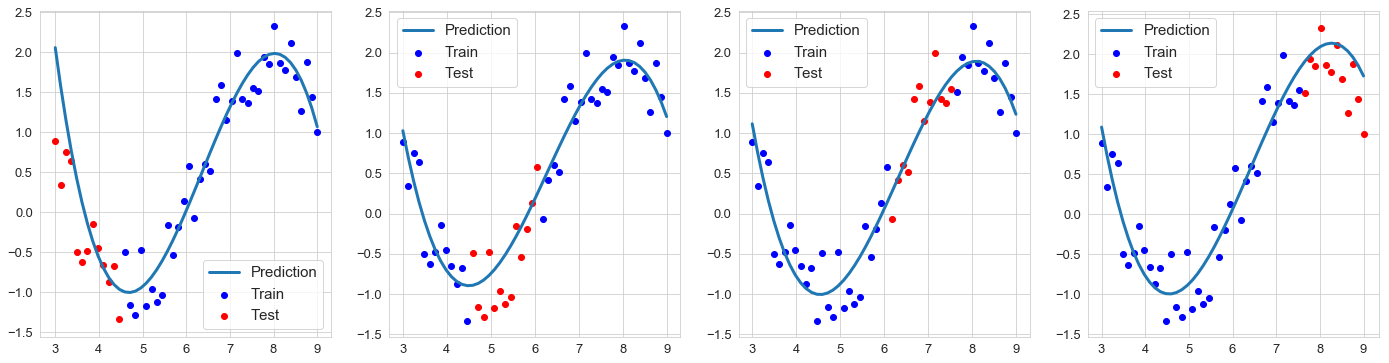

In [12]:
kfold = KFold(n_splits=4)

f, axs = plt.subplots(1,4,figsize=(24, 6))
for i, (train_indices, test_indices) in enumerate(kfold.split(X, y)):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    X_poly_train, X_poly_test = X_poly[train_indices], X_poly[test_indices]
    
    clf = LinearRegression()
    
    clf.fit(X_poly_train, y_train)
    
    y_hat = clf.predict(X_poly)
    
    axs[i].scatter(X_train, y_train, c='b', label='Train')
    axs[i].scatter(X_test,  y_test,  c='r', label='Test')
    axs[i].plot(X, y_hat, label='Prediction', linewidth=3.0)
    axs[i].legend()

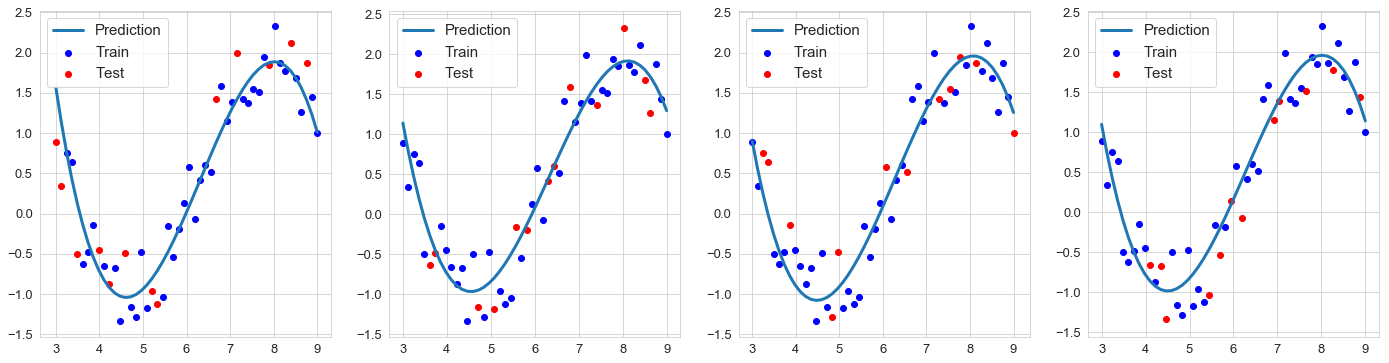

In [13]:
kfold = KFold(n_splits=4, shuffle=True, random_state=69)

f, axs = plt.subplots(1,4,figsize=(24, 6))
for i, (train_indices, test_indices) in enumerate(kfold.split(X, y)):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    X_poly_train, X_poly_test = X_poly[train_indices], X_poly[test_indices]
    clf = LinearRegression()
    clf.fit(X_poly_train, y_train)
    y_hat = clf.predict(X_poly)
    axs[i].scatter(X_train, y_train, c='b', label='Train')
    axs[i].scatter(X_test,  y_test,  c='r', label='Test')
    axs[i].plot(X, y_hat, label='Prediction', linewidth=3.0)
    axs[i].legend()

---

##### Как этим пользоваться?

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
scores = cross_val_score(LinearRegression(), X_poly, y, scoring='neg_mean_squared_error', cv=4)
# то же, что и
scores = cross_val_score(LinearRegression(), X_poly, y, scoring='neg_mean_squared_error', cv=KFold(n_splits=4))
#, но не то же, что и
scores = cross_val_score(LinearRegression(), X_poly, y, scoring='neg_mean_squared_error', cv=KFold(n_splits=4, shuffle=True))

In [16]:
print(scores)
print('Средняя ошибка равна %.3f +/- %.3f' % (-np.mean(scores), 2*np.std(scores)))

[-0.10617649 -0.1031142  -0.12268907 -0.14774469]
Средняя ошибка равна 0.120 +/- 0.035


---

# Классификация

In [17]:
from scipy.stats import multivariate_normal

In [18]:
m1 = np.array( [0, 0])
C1 = np.array([(5, 2), 
               (1, 5)])

m2 = np.array( [5, 2])
C2 = np.array([(1, 0), 
               (0, 1)])

g1 = multivariate_normal(mean=m1, cov=C1)
g2 = multivariate_normal(mean=m2, cov=C2)

In [19]:
X1 = np.array([g1.rvs() for _ in range(300)])
X2 = np.array([g2.rvs() for _ in range(50)])

X = np.vstack((X1,X2))
y = np.hstack((np.zeros(X1.shape[0]), np.ones(X2.shape[0])))

/Users/sandpiturtle/Library/Python/3.7/lib/python/site-packages/scipy/stats/_multivariate.py:652: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


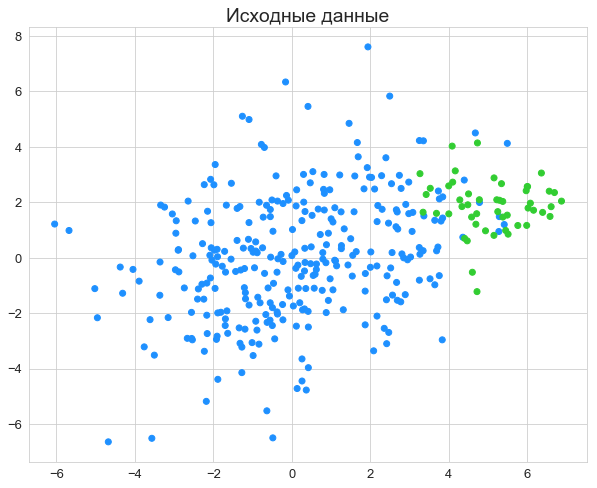

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=pd.Series(y).map({ 0: 'dodgerblue', 1: 'limegreen' }).values);
plt.title('Исходные данные');

## Валидация с помощью Stratified K-Fold

In [21]:
from sklearn.model_selection import StratifiedKFold

In [22]:
skfold = StratifiedKFold(n_splits=4)

for train_indices, test_indices in skfold.split(X, y):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    break

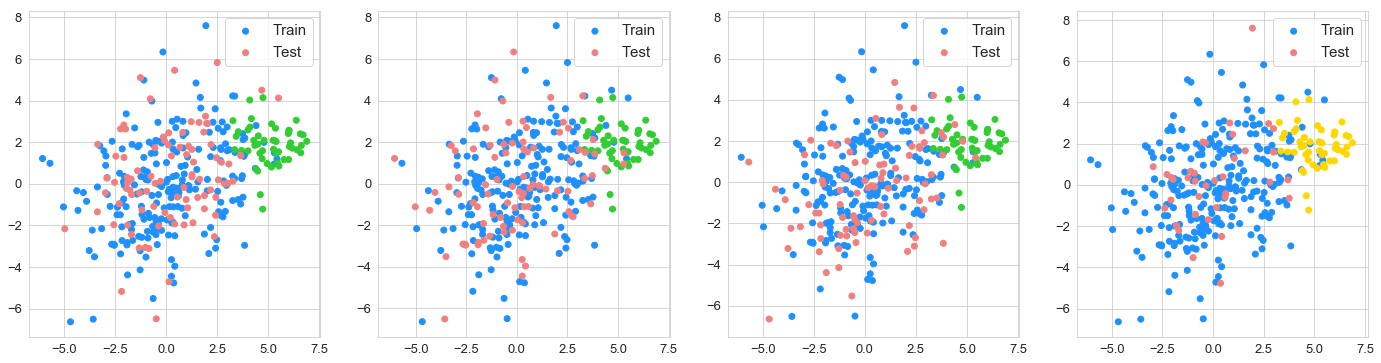

In [23]:
kfold = KFold(n_splits=4)

f, axs = plt.subplots(1,4,figsize=(24, 6))
for i, (train_indices, test_indices) in enumerate(kfold.split(X, y)):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=pd.Series(y_train).map({0: 'dodgerblue', 1: 'limegreen'}), label='Train')
    axs[i].scatter(X_test[:, 0], X_test[:, 1], c=pd.Series(y_test).map({0: 'lightcoral', 1: 'gold'}), label='Test')
    axs[i].legend()

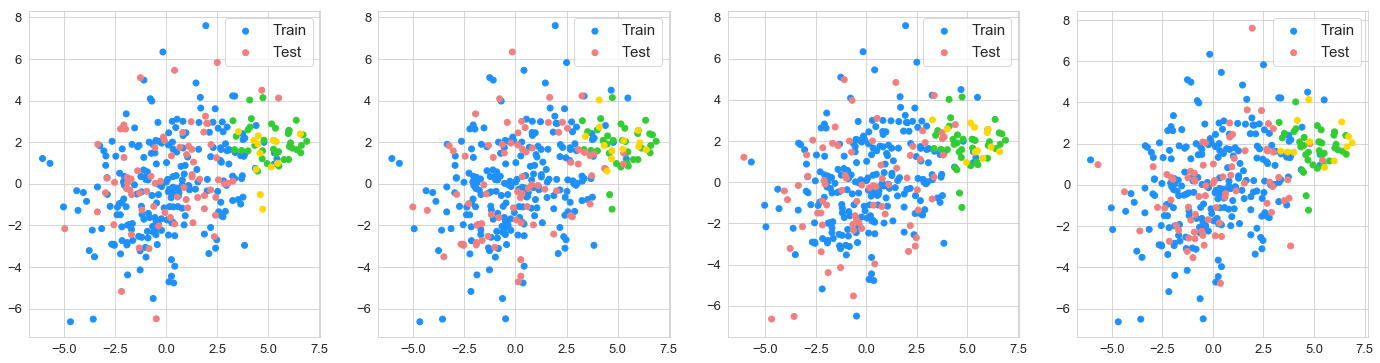

In [24]:
skfold = StratifiedKFold(n_splits=4)

f, axs = plt.subplots(1,4,figsize=(24, 6))
for i, (train_indices, test_indices) in enumerate(skfold.split(X, y)):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=pd.Series(y_train).map({0: 'dodgerblue', 1: 'limegreen'}), label='Train')
    axs[i].scatter(X_test[:, 0], X_test[:, 1], c=pd.Series(y_test).map({0: 'lightcoral', 1: 'gold'}), label='Test')
    axs[i].legend()

---

##### Как этим пользоваться?

In [25]:
scores = cross_val_score(LogisticRegression(), X, y, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=69))

/Users/sandpiturtle/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sandpiturtle/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sandpiturtle/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sandpiturtle/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
print(scores)
print('Средняя точность равна %.3f +/- %.3f' % (np.mean(scores), 2*np.std(scores)))

[0.94318182 1.         0.93103448 0.94252874]
Средняя точность равна 0.954 +/- 0.054
